In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('./births.csv')

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   year    15547 non-null  int64  
 1   month   15547 non-null  int64  
 2   day     15067 non-null  float64
 3   gender  15547 non-null  object 
 4   births  15547 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


In [5]:
df.isna().sum()

year        0
month       0
day       480
gender      0
births      0
dtype: int64

In [6]:
df.columns

Index(['year', 'month', 'day', 'gender', 'births'], dtype='object')

In [7]:
df['day'].fillna(0, inplace=True)

In [8]:
df['day'] = df['day'].astype(int)

In [9]:
df['decade'] = df['year'] // 10

In [10]:
df.pivot_table(values = 'births', index='decade', columns='gender', aggfunc='sum')

gender,F,M
decade,,
196,1753634,1846572
197,16263075,17121550
198,18310351,19243452
199,19479454,20420553
200,18229309,19106428


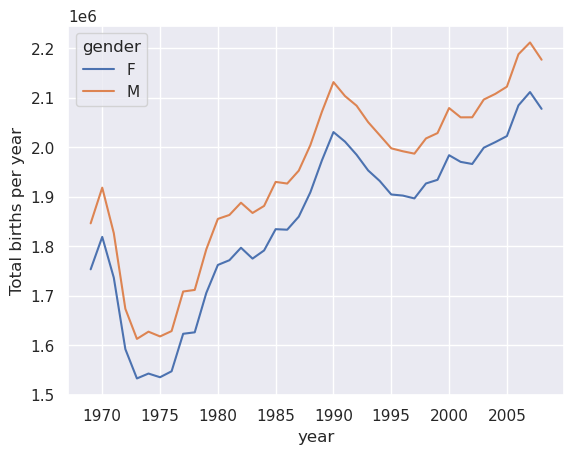

In [11]:
sns.set()
birth_decade = df.pivot_table('births', index='year', columns='gender', aggfunc='sum')
birth_decade.plot()
plt.ylabel('Total births per year')
plt.show()

In [12]:
quartiles = np.percentile(df['births'], [25,50,75])
mu = quartiles[1]
# Robust estimate of sample mean, 0.74 - comes from interquartile range of a Gaussian(Normal) distribution
sig = 0.74 * (quartiles[2] - quartiles[0])
# filter births out of these values
df1 = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)').copy()
# chained indexing warning - df1['day'] = df1['day'].astype(int) without using copy
df1['day'] = df1['day'].astype(int)

df1.index = pd.to_datetime(10000 * df1.year +
                          100 * df1.month +
                          df1.day, format='%Y%m%d')

df1['dayofweek'] = df1.index.dayofweek

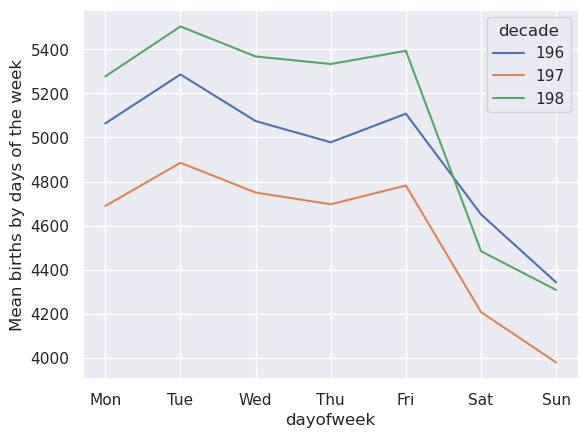

In [13]:
df1.pivot_table('births', index='dayofweek', columns='decade', aggfunc='mean').plot()
days_of_week = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
plt.gca().set_xticks(range(7))
plt.gca().set_xticklabels(days_of_week)
plt.ylabel('Mean births by days of the week')
plt.show()

In [27]:
# the same as using groupby
# births_month = df1.pivot_table('births', [df1.index.month, df1.index.day])
births_month = df1.groupby([df1.index.month, df1.index.day])['births'].mean()

births_month.index = [pd.Timestamp(2012, month, day)
                      for (month, day) in births_month.index]

births_month

2012-01-01    4009.225
2012-01-02    4247.400
2012-01-03    4500.900
2012-01-04    4571.350
2012-01-05    4603.625
                ...   
2012-12-27    4850.150
2012-12-28    5044.200
2012-12-29    5120.150
2012-12-30    5172.350
2012-12-31    4859.200
Name: births, Length: 366, dtype: float64

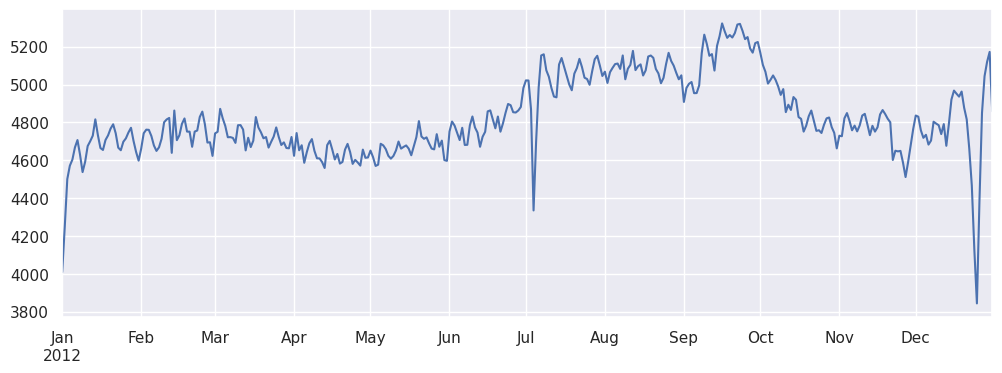

In [28]:
fig, ax = plt.subplots(figsize=(12, 4))
births_month.plot(ax=ax)
plt.show()